## Drug Delivery System- Neural Network based model

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
## import basic library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data=pd.read_csv("Dataset_17_feat.csv")
data.head()

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release
0,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,0.00,0.09,0.19,0.35,0.00
1,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,0.26,0.09,0.19,0.35,0.07
2,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,1.06,0.09,0.19,0.35,0.40
3,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,2.09,0.09,0.19,0.35,0.57
4,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,3.11,0.09,0.19,0.35,0.69


In [4]:
data["DP_Group"].unique()

array(['5-FU-PLGA', 'ACE-PVL-co-PAVL', 'CAF-PLGA', 'CBD-PCL', 'CBD-PLGA',
       'CCM-PVL-co-PAVL', 'DEX-PEA', 'DEX-PLGA', 'DPP-PLGA', 'ETC-PCL',
       'GEF-PLGA', 'HPA-PLGA', 'IBP-PLGA', 'LDC-PLGA', 'LPA-PLGA',
       'LTZ-PLGA', 'PRC-PLGA', 'PTX-PLA', 'PTX-PLA-co-PALA', 'PTX-PLGA',
       'PTX-PLGA-co-PALA', 'PTX-PLGA-co-PAVL', 'PTX-PVL-co-PAVL',
       'QRC-PCL', 'TAA-PEA', 'TAA-PLA-co-PALA', 'TAA-PLGA',
       'TAA-PLGA-co-PALA', 'TAA-PLGA-co-PAVL', 'TAA-PVL-co-PAVL',
       'TAH-PVL-co-PAVL', 'THC-PCL', 'TMZ-PLGA', 'TTD-PLGA'], dtype=object)

#### Drugs of Only PLGA formulation

In [5]:
df=data[data["DP_Group"].str.contains('PLGA')]
df

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release
0,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,0.00,0.09,0.19,0.35,0.00
1,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,0.26,0.09,0.19,0.35,0.07
2,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,1.06,0.09,0.19,0.35,0.40
3,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,2.09,0.09,0.19,0.35,0.57
4,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,3.11,0.09,0.19,0.35,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,19.86,0.06,0.09,0.15,0.99
3779,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,21.88,0.06,0.09,0.15,1.00
3780,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,24.16,0.06,0.09,0.15,1.00
3781,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,26.19,0.06,0.09,0.15,1.00


Feature selection

In [6]:
x=df.drop(df[['Experimental_index', 'DP_Group', 'Release']], axis=1)
y=df['Release']

In [7]:
x.head()

,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0
0,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,0.00,0.09,0.19,0.35
1,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,0.26,0.09,0.19,0.35
2,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,1.06,0.09,0.19,0.35
3,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,2.09,0.09,0.19,0.35
4,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,3.11,0.09,0.19,0.35


In [8]:
y.head()

0    0.00
1    0.07
2    0.40
3    0.57
4    0.69
Name: Release, dtype: float64

In [9]:
## splitting
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape, x_test.shape)

(1339, 17) (575, 17)


In [10]:
x_train.corr()

,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0
LA/GA,1.000000,-0.005725,0.715076,0.341867,-0.013719,0.350550,0.343762,0.227927,0.479293,0.580235,0.465129,0.462981,0.305492,0.176867,-0.326624,-0.358483,-0.367284
Polymer_MW,-0.005725,1.000000,-0.462976,0.238685,-0.262851,-0.174428,-0.231056,0.429724,-0.312744,0.016717,0.090004,0.087327,-0.168857,-0.124285,0.102392,0.138898,0.185991
CL Ratio,0.715076,-0.462976,1.000000,0.342965,0.065113,0.592984,0.596595,-0.192700,0.636569,0.384218,0.282612,0.287027,0.221623,0.224818,-0.303045,-0.346257,-0.377975
Drug_Tm,0.341867,0.238685,0.342965,1.000000,-0.079763,0.455048,0.441434,-0.012603,0.253611,0.219229,0.244703,0.258874,-0.166756,0.044119,-0.202433,-0.218783,-0.197313
Drug_Pka,-0.013719,-0.262851,0.065113,-0.079763,1.000000,-0.034508,-0.051863,-0.134930,0.305123,0.019121,-0.112911,-0.055277,0.078269,0.088861,-0.071618,-0.086957,-0.086769
Initial D/M ratio,0.350550,-0.174428,0.592984,0.455048,-0.034508,1.000000,0.940695,-0.276902,0.331892,0.099512,0.122326,0.103974,-0.125234,0.073426,0.222478,0.152401,0.142820
DLC,0.343762,-0.231056,0.596595,0.441434,-0.051863,0.940695,1.000000,-0.281873,0.343800,0.154381,0.177718,0.145326,-0.103366,0.066054,0.208001,0.116822,0.075745
SA-V,0.227927,0.429724,-0.192700,-0.012603,-0.134930,-0.276902,-0.281873,1.000000,-0.184255,0.275627,0.225276,0.211176,0.219313,-0.081304,-0.033356,0.012946,0.055953
SE,0.479293,-0.312744,0.636569,0.253611,0.305123,0.331892,0.343800,-0.184255,1.000000,0.323262,0.159792,0.248770,0.407600,0.238265,-0.188450,-0.193468,-0.200237
Drug_Mw,0.580235,0.016717,0.384218,0.219229,0.019121,0.099512,0.154381,0.275627,0.323262,1.000000,0.940904,0.936552,0.244084,0.286506,-0.255762,-0.320046,-0.334664


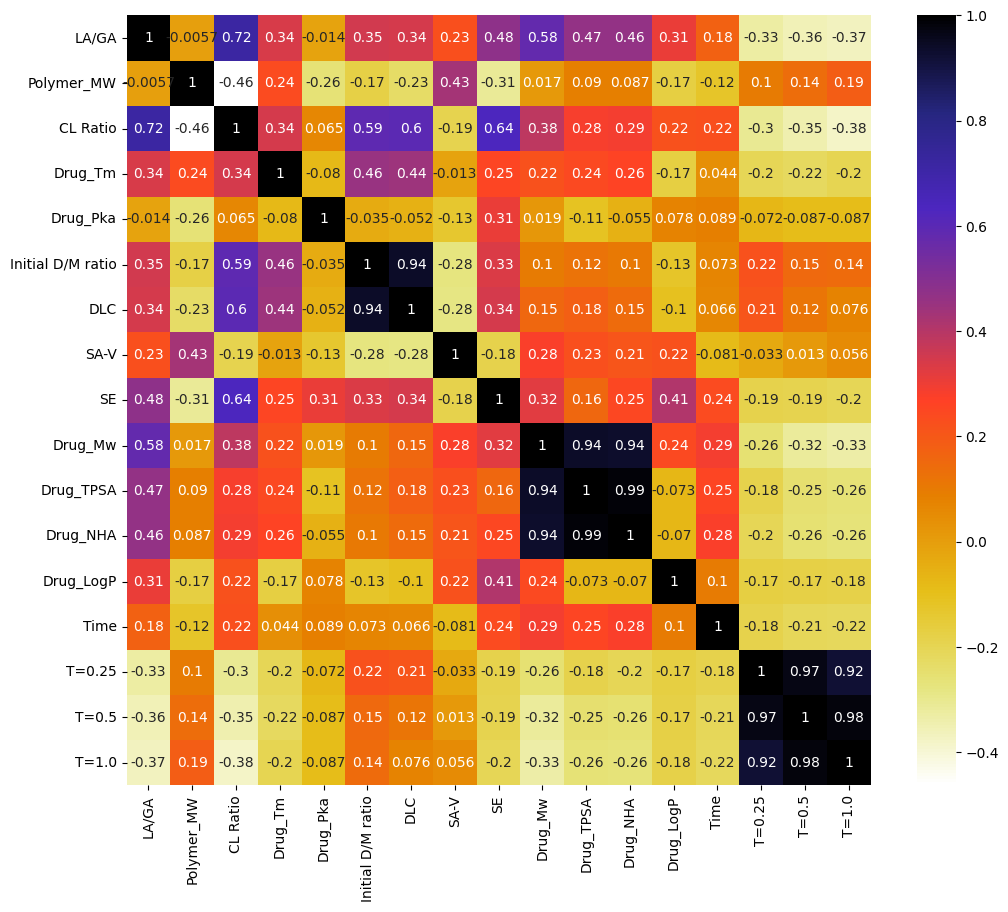

In [11]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [12]:
# following function will select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [13]:
##calling the function
corr_features = correlation(x_train, 0.9)
len(set(corr_features))

5

In [14]:
## All the correlated features
corr_features

{'DLC', 'Drug_NHA', 'Drug_TPSA', 'T=0.5', 'T=1.0'}

In [15]:
## Now dropping these correlated features
x_train=x_train.drop(corr_features,axis=1)
x_test=x_test.drop(corr_features,axis=1)

In [16]:
x_train

,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,SA-V,SE,Drug_Mw,Drug_LogP,Time,T=0.25
1760,3.0,11000.0,0.06,216.50,10.36,0.83,2.89,0.5,853.92,3.74,12.00,0.01
613,1.0,44000.0,0.00,213.00,16.11,0.10,1200.00,1.0,446.91,4.28,2.87,0.25
68,1.0,104000.0,0.00,282.50,7.76,0.80,152.67,0.0,130.08,-0.80,13.09,0.09
1327,1.0,40000.0,0.00,199.00,6.30,0.20,431.65,0.0,331.35,1.58,8.80,0.09
915,1.0,12000.0,0.00,68.50,13.78,0.03,1333.33,0.0,234.34,2.58,27.80,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...
992,1.0,12000.0,0.00,68.50,13.78,0.03,740.74,0.0,234.34,2.58,4.60,0.01
1373,1.0,40000.0,0.00,199.00,6.30,0.20,179.10,0.0,331.35,1.58,0.32,0.03
1937,3.0,10200.0,0.04,216.50,10.36,0.83,2.89,0.5,853.92,3.74,61.00,0.01
716,1.0,46000.0,0.00,76.25,4.85,0.21,34.36,0.0,206.29,3.07,0.00,0.11


In [17]:
 ## Feature scaling
 from  sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
 x_train=sc.fit_transform(x_train)
 x_test=sc.transform(x_test)

In [18]:
x_train

array([[ 1.57335355, -1.00947524,  2.55820379, ...,  0.80717722,
        -0.23427594, -0.61189163],
       [-0.67365909,  0.05422115, -0.45449179, ...,  1.11784086,
        -0.77012228,  3.0001123 ],
       [-0.67365909,  1.98821458, -0.45449179, ..., -1.80469854,
        -0.17030304,  0.59210968],
       ...,
       [ 1.57335355, -1.03526182,  1.55397193, ...,  0.80717722,
         2.64156969, -0.61189163],
       [-0.67365909,  0.11868759, -0.45449179, ...,  0.42172419,
        -0.93856466,  0.89311001],
       [-0.67365909, -0.97724202, -0.45449179, ...,  0.1398257 ,
         1.99068953, -0.46139147]])

In [19]:
x_test

array([[ 1.57335355, -1.03526182,  1.55397193, ...,  0.80717722,
         0.47001279, -0.61189163],
       [-0.67365909, -0.97724202, -0.45449179, ...,  0.1398257 ,
         0.21177359, -0.46139147],
       [-0.67365909,  0.11868759, -0.45449179, ...,  0.42172419,
        -0.87987394,  0.59210968],
       ...,
       [ 0.29255635,  0.49581631, -0.45449179, ...,  0.18584995,
        -0.11513376, -0.3108913 ],
       [-0.67365909,  0.05422115, -0.45449179, ...,  1.11784086,
        -0.35400502, -0.46139147],
       [-0.67365909, -0.97724202, -0.45449179, ..., -2.00030157,
         2.34694224,  0.89311001]])

In [20]:
x_train.shape


(1339, 12)

In [21]:
## Part 2, let's create the ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU,ReLU
from tensorflow.keras.layers import Dropout

from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

In [22]:
## Initialize the ANN
model = Sequential()


In [23]:
## Adding input layer
model.add(Dense(units=12, activation='relu'))

In [24]:
## Adding the first hidden layer,
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2)) # adding droput in each layer

In [25]:
## Adding the second hidden layer,
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))

In [26]:
## Adding the output layer, 1 neuron
model.add(Dense(units=1, activation='linear'))

In [27]:
## compile, by default adam uses learning rate of  0.01
model.compile(optimizer='adam', loss='mean_squared_error', metrics= ['mae'] )

In [28]:
## Early Stopping->when the val_loss becomes stagnant, model automatically stops training
import tensorflow as tf

early_stopping =tf. keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [29]:
## Train our Neural network
model_history=model.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
90/90 [==============================] - 2s 8ms/step - loss: 0.1137 - mae: 0.2640 - val_loss: 0.0594 - val_mae: 0.1869
Epoch 2/1000
90/90 [==============================] - 0s 4ms/step - loss: 0.0757 - mae: 0.2170 - val_loss: 0.0454 - val_mae: 0.1611
Epoch 3/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.0625 - mae: 0.1918 - val_loss: 0.0383 - val_mae: 0.1484
Epoch 4/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.0525 - mae: 0.1765 - val_loss: 0.0320 - val_mae: 0.1361
Epoch 5/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.0443 - mae: 0.1636 - val_loss: 0.0343 - val_mae: 0.1404
Epoch 6/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.0390 - mae: 0.1503 - val_loss: 0.0278 - val_mae: 0.1215
Epoch 7/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.0354 - mae: 0.1438 - val_loss: 0.0262 - val_mae: 0.1209
Epoch 8/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.

In [30]:
model_history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

### Plotting the Training and validation accuracy and Loss at each epoch

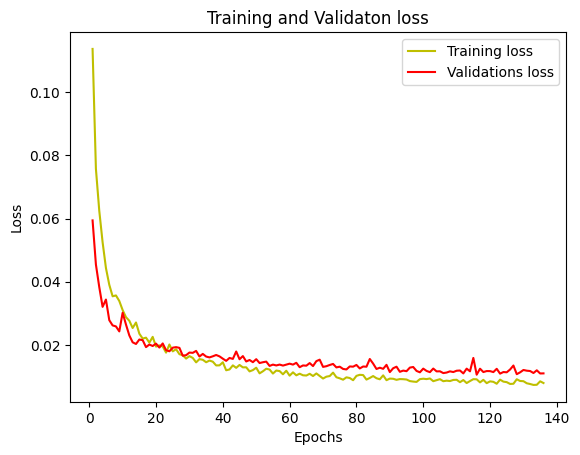

In [31]:
loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validations loss')
plt.title('Training and Validaton loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


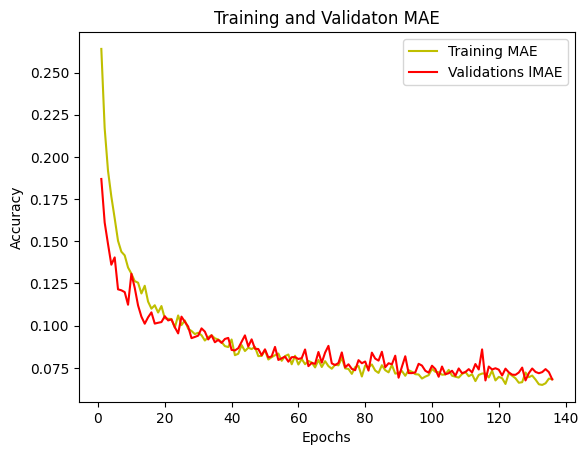

In [32]:
acc=model_history.history['mae']
val_acc=model_history.history['val_mae']
#epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validations lMAE')
plt.title('Training and Validaton MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 128)               1664      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10141 (39.61 KB)
Trainable params: 10141 (

In [ ]:
##get the weights
model.get_weights()

[array([[-0.22827986,  0.22986116,  0.25537366, -0.32220614, -0.23604897,
         -0.03786223, -0.04218395, -0.21379681, -0.14271738, -0.1669988 ,
          0.21916352, -0.53976226],
        [-0.26862043, -0.43390658,  0.16590255,  0.36283934,  0.47460285,
         -0.28209502, -0.34397915, -0.31003538,  0.08394217,  0.28765133,
          0.24789949, -0.46375984],
        [-0.17295805,  0.0857493 , -0.22273198, -0.21760696,  0.20146577,
          0.03150927,  0.346055  , -0.39178643,  0.02413255,  0.10685665,
          0.3555944 , -0.26339135],
        [ 0.08081065,  0.2655207 , -0.15355486,  0.2894151 , -0.276247  ,
         -0.20715511,  0.1590285 , -0.1634845 ,  0.23467965, -0.18237425,
         -0.3755836 ,  0.06154491],
        [-0.15515181, -0.1643127 ,  0.4184913 ,  0.37657988, -0.19053128,
          0.19968575,  0.4187322 ,  0.25844923,  0.3627519 ,  0.09085765,
          0.3079721 , -0.13714994],
        [ 0.31518158, -0.11498754,  0.34283128,  0.383817  , -0.3945109 ,
      

### Prediction on Test data

In [36]:
x_test[0]

array([ 1.57335355, -1.03526182,  1.55397193,  0.32425012, -0.0468859 ,
        1.30471843, -0.42398947,  1.4006172 ,  1.48176903,  0.80717722,
        0.47001279, -0.61189163])

### Predicting the new data

In [106]:
##testing dataframe
new_data = {
    "LA/GA": [1] * 16,
    "Polymer_MW": [46000] * 16,
    "CL Ratio": [0] * 16,
    "Drug_Tm": [236] * 16,
    "Drug_Pka": [14] * 16,
    "Initial D/M ratio": [0.11] * 16,
    "SA-V": [97.09] * 16,
    "SE": [0] * 16,
    "Drug_Mw": [61.82] * 16,
    "Drug_LogP": [-1.03] * 16,
    "Time": [0, 0.09, 0.13, 0.31, 0.97, 1.23, 2.02, 3.03, 4, 6.99, 8, 8.92, 10.02, 13.98, 16, 17.05],
    "T=0.25":[0.04]*16,
}
new_df = pd.DataFrame(new_data)


In [107]:
## scalling the new data
transfromed=sc.fit_transform(new_df)
# Predict release values at different times T
predicted_release = model.predict(transfromed)

1/1 [==============================] - 0s 23ms/step


In [108]:
## Now creating a dataframe for the prediction of new data
actual_values = [0, 0.01, 0.03, 0.05, 0.12, 0.14, 0.19, 0.24, 0.32, 0.56, 0.7, 0.86, 0.96, 1, 1, 1]
time_values = [0, 0.09, 0.13, 0.31, 0.97, 1.23, 2.02, 3.03, 4, 6.99, 8, 8.92, 10.02, 13.98, 16, 17.05]
# Create a DataFrame
df_actual = pd.DataFrame({"Actual_Release": actual_values, "time":time_values})
df_actual["Predicted"]=predicted_release

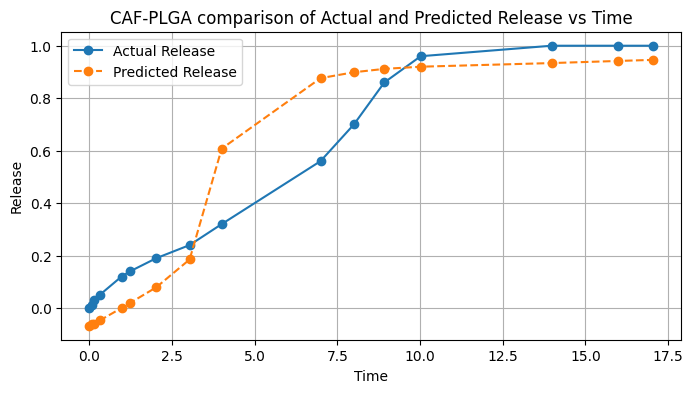

In [109]:
import matplotlib.pyplot as plt

# Plot actual and predicted release values against time
plt.figure(figsize=(8, 4))
plt.plot(df_actual["time"], df_actual["Actual_Release"], marker='o', label='Actual Release')
plt.plot(df_actual["time"], df_actual["Predicted"], marker='o', linestyle='--', label='Predicted Release')
plt.xlabel('Time')
plt.ylabel('Release')
plt.title('CAF-PLGA comparison of Actual and Predicted Release vs Time')
plt.legend()
plt.grid(True)
plt.show()


In [110]:
##testing dataframe
new1_data = {
    "LA/GA": [1] * 24,
    "Polymer_MW": [104000] * 24,
    "CL Ratio": [0] * 24,
    "Drug_Tm": [282.5] * 24,
    "Drug_Pka": [7.76] * 24,
    "Initial D/M ratio": [0.8] * 24,
    "SA-V": [152.76] * 24,
    "SE": [0] * 24,
    "Drug_Mw": [130.08] * 24,
    "Drug_LogP": [-0.8] * 24,
     "Time":[0.00, 0.20, 0.33, 1.11, 2.07, 3.15, 4.11, 4.99, 6.07, 7.08,8.09, 9.04, 10.12, 11.07, 12.08, 13.09, 14.17, 15.18, 16.06, 17.27, 18.09, 19.17, 20.05, 21.06],
    "T=0.25":[0.09]*24,
}
df_FU = pd.DataFrame(new1_data)


In [111]:
## scalling the new data
transfromed=sc.fit_transform(df_FU)
# Predict release values at different times T
predicted_release = model.predict(transfromed)

1/1 [==============================] - 0s 21ms/step


In [112]:
predicted_release

array([[-0.23041973],
       [-0.21938112],
       [-0.21220598],
       [-0.16904601],
       [-0.11674148],
       [-0.05649361],
       [ 0.00136521],
       [ 0.05716974],
       [ 0.12689674],
       [ 0.38303557],
       [ 0.7071159 ],
       [ 0.7896646 ],
       [ 0.83558893],
       [ 0.874519  ],
       [ 0.89600396],
       [ 0.9084115 ],
       [ 0.919729  ],
       [ 0.9204674 ],
       [ 0.92226374],
       [ 0.9256066 ],
       [ 0.92891634],
       [ 0.933355  ],
       [ 0.93664205],
       [ 0.93996155]], dtype=float32)

In [113]:
## Now creating a dataframe for the prediction of new data
actual_values = [0, 0.05, 0.14, 0.3, 0.44, 0.51, 0.56, 0.58, 0.62, 0.63, 0.65, 0.7, 0.72, 0.76, 0.76, 0.79, 0.81, 0.82, 0.85, 0.89, 0.91, 0.96, 1, 1.01]
time_values=[0.00, 0.20, 0.33, 1.11, 2.07, 3.15, 4.11, 4.99, 6.07, 7.08,8.09, 9.04, 10.12, 11.07, 12.08, 13.09, 14.17, 15.18, 16.06, 17.27, 18.09, 19.17, 20.05, 21.06]
# Create a DataFrame
df_actual1 = pd.DataFrame({"Actual_Release": actual_values, "time":time_values})
df_actual1["Predicted"]=predicted_release

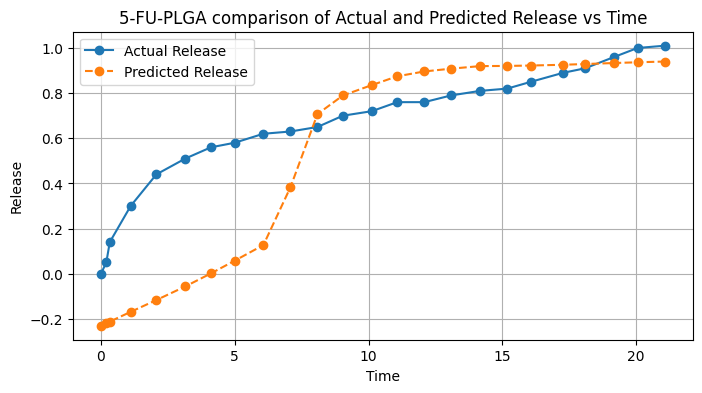

In [114]:
import matplotlib.pyplot as plt

# Plot actual and predicted release values against time
plt.figure(figsize=(8, 4))
plt.plot(df_actual1["time"], df_actual1["Actual_Release"], marker='o', label='Actual Release')
plt.plot(df_actual1["time"], df_actual1["Predicted"], marker='o', linestyle='--', label='Predicted Release')
plt.xlabel('Time')
plt.ylabel('Release')
plt.title('5-FU-PLGA comparison of Actual and Predicted Release vs Time')
plt.legend()
plt.grid(True)
plt.show()


In [115]:
##testing dataframe
new2_data = {
    "LA/GA": [3] * 8,
    "Polymer_MW": [20000] *8,
    "CL Ratio": [0] * 8,
    "Drug_Tm": [212] *8,
    "Drug_Pka": [10.46] * 8,
    "Initial D/M ratio": [0.1] * 8,
    "SA-V": [95.85] * 8,
    "SE": [0] * 8,
    "Drug_Mw": [194.15] * 8,
    "Drug_LogP": [-2.08] * 8,
    "Time" : [0, 0.1, 1.09, 7, 14, 21.09, 28.08, 35.15],
    "T=0.25":[0.06]*8,
}
df_TMZ = pd.DataFrame(new2_data)


In [116]:
## scalling the new data
transfromed=sc.fit_transform(df_TMZ)
# Predict release values at different times T
predicted_release = model.predict(transfromed)

1/1 [==============================] - 0s 21ms/step


In [117]:
## Now creating a dataframe for the prediction of new data
time_values = [0, 0.1, 1.09, 7, 14, 21.09, 28.08, 35.15]
actual_values = [0, 0, 0.22, 0.32, 0.55, 0.76, 0.95, 0.96]
# Create a DataFrame
df_actual2 = pd.DataFrame({"Actual_Release": actual_values, "time":time_values})
df_actual2["Predicted"]=predicted_release

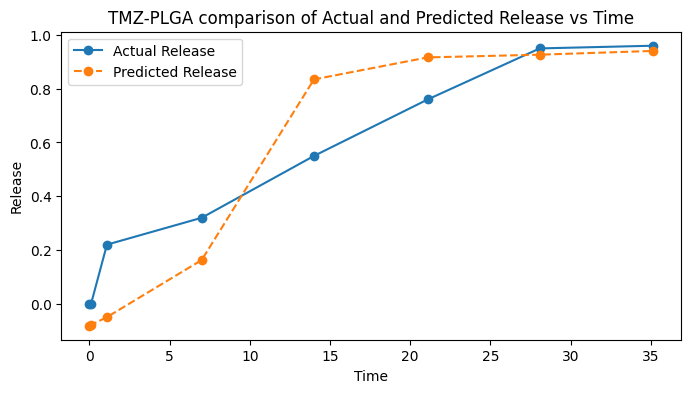

In [118]:
import matplotlib.pyplot as plt

# Plot actual and predicted release values against time
plt.figure(figsize=(8, 4))
plt.plot(df_actual2["time"], df_actual2["Actual_Release"], marker='o', label='Actual Release')
plt.plot(df_actual2["time"], df_actual2["Predicted"], marker='o', linestyle='--', label='Predicted Release')
plt.xlabel('Time')
plt.ylabel('Release')
plt.title('TMZ-PLGA comparison of Actual and Predicted Release vs Time')
plt.legend()
plt.show()



In [ ]:
## Taking first 5 records of test data
predictions=model.predict(x_test[:5])
print("Prediction values are:", predictions)
print("Real values are:", y_test[:5])

In [ ]:
## Creating a new Data frame for result
import pandas as pd
predictions = model.predict(x_test)

# Creating a DataFrame to store the results for all records
results = pd.DataFrame({
    "Record": range(1, len(predictions) + 1),
    "Predicted Value": predictions.flatten(),
    "Real Value": y_test  # Include all real values from the test set
})



In [ ]:
results.head(20)

In [ ]:
results.shape

In [ ]:
# import matplotlib.pyplot as plt

# # Sort results by Record (just in case they're not already sorted)
# results_sorted = results.sort_values(by='Record')

# # Plot predicted vs. real values
# plt.figure(figsize=(12, 6))
# plt.plot(results_sorted['Record'], results_sorted['Predicted Value'], label='Predicted Value', marker='o')
# plt.plot(results_sorted['Record'], results_sorted['Real Value'], label='Real Value', marker='x')
# plt.title('Comparison of Predicted and Real Values')
# plt.xlabel('Record')
# plt.ylabel('Value')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
results_sorted = results.sort_values(by='Record')

# predicted vs. real values
plt.figure(figsize=(10, 6))
plt.scatter(results_sorted['Real Value'], results_sorted['Predicted Value'], color='blue', alpha=0.5, label='Predicted vs. Real')
plt.plot(results_sorted['Real Value'], results_sorted['Real Value'], color='red', linestyle='--', label='Perfect Prediction')  # Plot diagonal line
plt.title('Predicted vs. Real Values')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.legend()
# plt.grid(True)
plt.show()


In [ ]:
## Points that lie on the perfect prediction line
# Count the number of points on the diagonal line (perfect predictions)
perfect_predictions = results_sorted[results_sorted['Real Value'] == results_sorted['Predicted Value']]
len(perfect_predictions)


## Comaprison with other models
### Neural Network- from the current model

In [ ]:
mse_neural, mae_neural = model.evaluate(x_test, y_test)
print("Mean Squared Error:",  mse_neural )
print("Mean Absolute Error:",  mae_neural )

18/18 [==============================] - 0s 3ms/step - loss: 0.0145 - mae: 0.0840
Mean Squared Error: 0.014533378183841705
Mean Absolute Error: 0.08402914553880692


### Linear Regression

In [ ]:
 from sklearn.linear_model import LinearRegression
 from sklearn.tree import DecisionTreeRegressor
 from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
## Linear Regression
lr_model=LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr=lr_model.predict(x_test)
mse_lr=mean_squared_error(y_test, y_pred_lr)
mae_lr=mean_absolute_error(y_test, y_pred_lr)
print('MSE for Linear Regression:', mse_lr)
print('MAE for Linear Regression:', mae_lr)


MSE for Linear Regression: 0.04898989943094156
MAE for Linear Regression: 0.17436216365105675


In [ ]:
## Taking first 5 records of test data
predictions=lr_model.predict(x_test[:5])
real=y_test[:5]
print("Prediction values are:", predictions)
print("Real values are:", real)

Prediction values are: [0.17662665 0.50457583 0.33704408 0.34177977 0.50814212]
Real values are: 1922    0.12
985     0.71
753     0.13
365     0.08
154     0.86
Name: Release, dtype: float64


### Decision Tree

In [ ]:
tree=DecisionTreeRegressor()
tree.fit(x_train, y_train)
y_pred_tree=tree.predict(x_test)
mse_tree=mean_squared_error(y_test, y_pred_tree)
mae_tree=mean_absolute_error(y_test, y_pred_tree)
print('MSE for Decision Tree:', mse_tree)
print('MAE for  Decision Tree:', mae_tree)


MSE for Decision Tree: 0.015698739130434784
MAE for  Decision Tree: 0.06860000000000001


In [ ]:
## Taking first 5 records of test data
predictions=tree.predict(x_test[:5])
real=y_test[:5]
print("Prediction values are:", predictions)
print("Real values are:", real)

Prediction values are: [0.42 0.65 0.3  0.1  0.6 ]
Real values are: 1922    0.12
985     0.71
753     0.13
365     0.08
154     0.86
Name: Release, dtype: float64


### Random Forest

In [ ]:
model_rf=RandomForestRegressor(n_estimators=30, random_state=0)
model_rf.fit(x_train, y_train)
y_pred_rf=model_rf.predict(x_test)
mse_rf=mean_squared_error(y_test, y_pred_rf)
mae_rf=mean_absolute_error(y_test, y_pred_rf)
print('MSE for Random Forest:', mse_rf)
print('MAE for  Random Forest:', mae_rf)


MSE for Random Forest: 0.006915568000640835
MAE for  Random Forest: 0.05193048309178743


In [ ]:
## Taking first 5 records of test data
predictions=model_rf.predict(x_test[:5])
real=y_test[:5]
print("Prediction values are:", predictions)
print("Real values are:", real)

Prediction values are: [0.19633333 0.65433333 0.21933333 0.08966667 0.63433333]
Real values are: 1922    0.12
985     0.71
753     0.13
365     0.08
154     0.86
Name: Release, dtype: float64


### Important features for the random forests

In [ ]:
x.corr()

NameError: name 'x' is not defined

In [ ]:
x_imp=x.drop(corr_features,axis=1)

NameError: name 'x' is not defined

In [ ]:
import pandas as pd

feature_list = list(x_imp.columns)
imp_features = pd.Series(model_rf.feature_importances_, index=feature_list)
imp_features = imp_features.sort_values(ascending=False)  # Corrected method name
print(imp_features)


Time                 0.546884
LA/GA                0.147959
T=0.25               0.135598
Drug_Mw              0.041601
SA-V                 0.035373
Polymer_MW           0.025766
Initial D/M ratio    0.017261
Drug_LogP            0.015274
SE                   0.011980
Drug_Pka             0.011137
Drug_Tm              0.006648
CL Ratio             0.004518
dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
feature_list = list(x_imp.columns)
imp_features = pd.Series(model_rf.feature_importances_, index=feature_list)
imp_features = imp_features.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 4))
imp_features.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


NameError: name 'x_imp' is not defined

In [ ]:
print("Linear Regression MSE", mse_lr)
print("Decision Tree MSE", mse_tree )
print("Random Forest MSE",mse_rf )
print("ANN(Neural Network) MSE", mse_neural)

Linear Regression MSE 0.04898989943094156
Decision Tree MSE 0.015698739130434784
Random Forest MSE 0.006915568000640835
ANN(Neural Network) MSE 0.014533378183841705


In [ ]:
print("Linear Regression MAE", mae_lr)
print("Decision Tree MAE", mae_tree )
print("Random Forest MAE",mae_rf )
print("ANN(Neural Network) MAE", mae_neural)

Linear Regression MAE 0.17436216365105675
Decision Tree MAE 0.06860000000000001
Random Forest MAE 0.05193048309178743
ANN(Neural Network) MAE 0.08402914553880692
